In [8]:
# %matplotlib inline
%matplotlib notebook

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
from matplotlib import pyplot as plt
from matplotlib import rc
rc('text', usetex=True)

import os
import json
import copy
import numpy as np
from astropy.table import Table, Column
from collections import OrderedDict

import pycoco as pcc
plt.close("all")

In [9]:
from lcsim.lcsim import LCSim
import pyCoCo as pccsim

fltPath = pcc.utils.b(pcc.defaults._default_filter_dir_path)
rootPath = pcc.utils.b(pcc.defaults._default_coco_dir_path)
coco = pccsim.pyCoCo(fltPath, rootPath)
lcs = LCSim()

info = pcc.classes.InfoClass()
info.load(path=pcc.defaults._default_info_path.replace(".dat", "_new.dat"))

print(fltPath, rootPath)

b'/Users/berto/Code/CoCo/data/filters/' b'/Users/berto/Code/CoCo/'


<IPython.core.display.Javascript object>


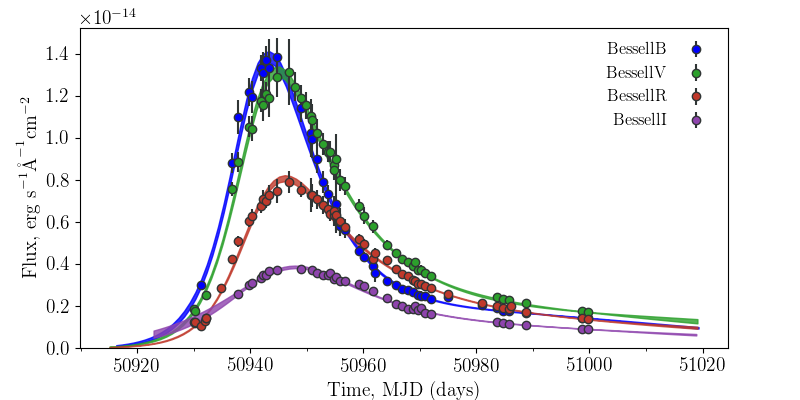

In [10]:
snname = "SN1998bw"

sn = pcc.classes.SNClass(snname)
sn.load_phot(verbose=False)
sn.get_lcfit("/Users/berto/Code/CoCo/recon/" + snname + ".dat")

sn.plot_lc(multiplot=False)

In [11]:
info = pcc.classes.InfoClass()
info.load(path=pcc.defaults._default_info_path)
          
mjdmax = pcc.utils.get_mjdmax(sn, "BessellB")[0]
mjdmax_to_sim = 0
z_to_sim = info.get_sn_info(sn.name)["z_distmod"][0]

print("MJDMAX = ", mjdmax)
print("SIM z = ", z_to_sim)

MJDMAX =  50943.232
SIM z =  0.0079313906637


In [12]:
path_to_filter = os.path.join(pcc.defaults._default_filter_dir_path,"BessellB.dat")  

BessellB = pcc.classes.FilterClass()
BessellB.read_filter_file(path_to_filter)
BessellB.calculate_AB_zp()

mjd_list = np.arange(0.,95,0.1)-30.
mjd_to_sim = np.array([])
filters_to_sim = []

for mjd in mjd_list:
    filters_to_sim = np.append(filters_to_sim, pcc.utils.b(BessellB.filter_name))
    mjd_to_sim = np.append(mjd_to_sim, mjd)

time_dilation = 1.+z_to_sim

def time_dilate(mjd_arr, z, mjdmax=False):
    if mjdmax:
        mjd_arr = mjd_arr - mjdmax
    
    return mjd_arr * (1.0 + z_to_sim)
    

<IPython.core.display.Javascript object>


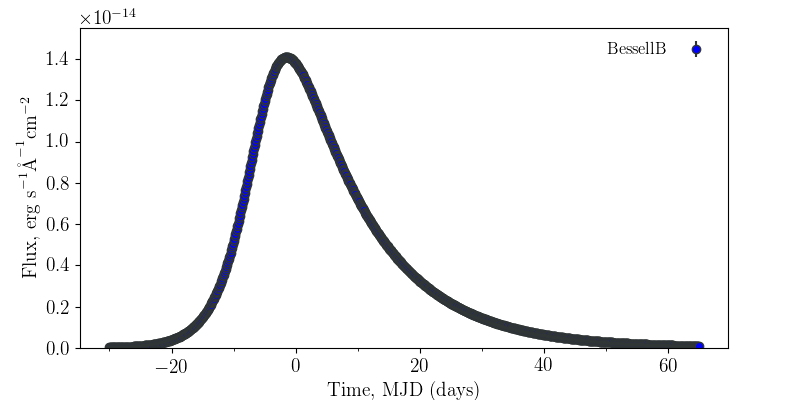

In [13]:
flux, flux_err = coco.simulate(pcc.utils.b(snname),
                               z_to_sim, 0.0, 0.0, 0.0, 3.1,
                               mjdmax_to_sim, mjd_to_sim,
                               filters_to_sim)

specphot = coco.spec_photometry(pcc.utils.b(snname), 
             z_to_sim, b"BessellB")


sn_sim = pcc.classes.SNClass("SN1998bw")
sn_sim.load_phot(phot_table = pcc.utils.simulate_out_to_ap_table(mjd_to_sim, flux, flux_err, filters_to_sim))

sn_sim.plot_lc(multiplot=False)

<IPython.core.display.Javascript object>


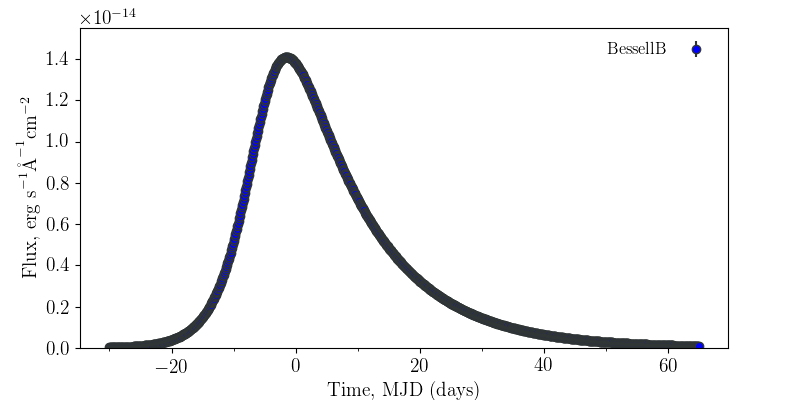

In [14]:
flux, flux_err = coco.simulate_model(pcc.utils.b(snname), pcc.utils.b("Karpenka12Afterglow"),
                               z_to_sim, 0.0, 0.0, 0.0, 3.1,
                               mjdmax_to_sim, mjd_to_sim,
                               filters_to_sim)

specphot = coco.spec_photometry(pcc.utils.b(snname), 
             z_to_sim, b"BessellB")


sn_sim = pcc.classes.SNClass("SN1998bw")
sn_sim.load_phot(phot_table = pcc.utils.simulate_out_to_ap_table(mjd_to_sim, flux, flux_err, filters_to_sim))

sn_sim.plot_lc(multiplot=False)